<a href="https://colab.research.google.com/github/hochthom/OG-AI4Artists-2021/blob/main/Lecture4_StyleGAN_Example/StyleGAN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from stylegan2 import StyleGAN

In [3]:
!ls -l /content/drive/MyDrive/AI4Artists/OG-AI4Artists-2021/data/Lecture4_StyleGAN

total 711797
-rw------- 1 root root 393032041 Apr 29 09:07 abstract_512.zip
-rw------- 1 root root  99184978 May 30 09:20 metFaces_256_subset.zip
-rw------- 1 root root  77037402 Jun  2 06:39 MetFaces_256x256_StyleGAN2_model_200k.zip
-rw------- 1 root root 159624772 Apr 29 15:41 metFaces_256.zip


Here we need to define the path to our images. We can either link to a folder containing the inages or to a zip file.

In [4]:
IMAGE_SOURCE = '/content/drive/MyDrive/AI4Artists/OG-AI4Artists-2021/data/Lecture4_StyleGAN/metFaces_256.zip'
print(os.path.exists(IMAGE_SOURCE))

True


Initialisation
==============

Let's build the StyleGAN model and initialize our data set.

In [5]:
RESULT_DIR = '.'
model = StyleGAN(lr=0.0001, silent=False, path=RESULT_DIR)
model.create_data(IMAGE_SOURCE)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1024)         2048        lambda[0][0]                     
__________________________________________________________________________________________________
reshape (Reshape)               (None, 4, 4, 64)     0           dense_5[0][0]                    
____________________________________________________________________________________________

By loading a previously saved model we can continue training from that snapshot. 

In [ ]:
model.load(0)

Training
========

Next we train the styleGAN for some epochs. The number of epochs depends on the dataset, but in general the longer the better (e.g. epochs ~ 40k).

In [6]:
steps = 10001
for e in tqdm(range(steps)):
    model.train()

Round    100: D =  4.8319, G =  7.3498, PL =  0.0891
Round    200: D =  2.1869, G =  2.4760, PL =  0.0376
Round    300: D =  1.0127, G =  0.5512, PL =  0.0176
Round    400: D =  3.7081, G =  2.0967, PL =  0.0110
Round    500: D =  1.4913, G =  0.0283, PL =  0.0075
Round    600: D =  0.6702, G =  0.7765, PL =  0.0064
Round    700: D =  0.8188, G =  0.5733, PL =  0.0053
Round    800: D =  0.9230, G =  1.4677, PL =  0.0061
Round    900: D =  1.6251, G = -0.1422, PL =  0.0063
Round   1000: D =  1.5841, G =  3.1849, PL =  0.0062
Saving a model snapshot to m0 ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Round   1100: D =  1.2147, G =  1.5704, PL =  0.0052
Round   1200: D =  0.5808, G =  0.8736, PL =  0.0105
Round   1300: D =  1.6003, G =  1.7131, PL =  0.0071
Round   1400: D =  0.5478, G =  0.9004, PL =  0.0058
Round   1500: D =  1.9630, G = -0.6677, PL =  0.0057
Round   1600: D =  1.6638, G = -0.3517, PL =  0.0063
Round   1700: D =  0.4891, G =  0.8824, PL =  0.0061
Round   1800: D =  0.6927, G =  0.7304, PL =  0.0055
Round   1900: D =  0.5449, G =  1.0953, PL =  0.0049
Round   2000: D =  0.5353, G =  0.7903, PL =  0.0056
Saving a model snapshot to m1 ...
Round   2100: D =  0.3046, G =  2.7622, PL =  0.0060
Round   2200: D =  1.1760, G =  0.2981, PL =  0.0042
Round   2300: D =  1.4748, G =  0.0963, PL =  0.0048
Round   2400: D =  0.8017, G =  1.8797, PL =  0.0039
Round   2500: D =  0.2689, G =  1.1863, PL =  0.0044
Round   2600: D =  0.2776, G =  1.1594, PL =  0.0039
Round   2700: D =  0.7735, G =  0.9814, PL =  0.0043
Round   2800: D =  1.4964, G =  2.5691, PL =  0.0051
Round   2900

Evaluation of our image generator
=================================

In [7]:
img_style, img_noise = model.create_image_styles(15)

In [8]:
imgs = model.generate_images(img_style, img_noise)
imgs.shape

(15, 256, 256, 3)

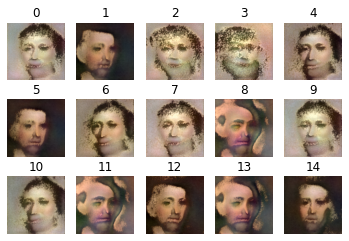

In [9]:
for i in range(15):
  img_u8 = np.uint8(np.clip(imgs[i], 0.0, 1.0) * 255)
  plt.subplot(3, 5, i+1)
  plt.title(i)
  plt.imshow(img_u8)
  plt.axis('off')

Let's morph one image to another one

In [10]:
imgs = model.generate_image_seq(img_style, img_noise, 2, 12, n_imgs=15)

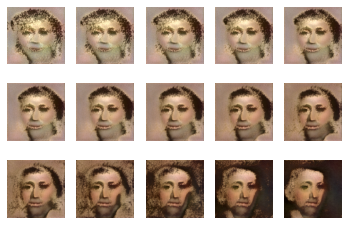

In [11]:
for i in range(15):
  img_u8 = np.uint8(np.clip(imgs[i], 0.0, 1.0) * 255)
  plt.subplot(3, 5, i+1)
  plt.imshow(img_u8)
  plt.axis('off')